In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score #regresyonların başarı ölçüm metrikleri
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, cohen_kappa_score, roc_auc_score,roc_curve,classification_report,confusion_matrix #classficiationlar başarı ölçüm metriklerinden
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [3]:
datasetpath=r"E:\OneDrive\Dökümanlar\GitHub\dataset\Regression\california housing.csv"

In [4]:
housing=pd.read_csv(datasetpath)

In [5]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [15]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [16]:
housing.nunique()

longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1923
population             3888
households             1815
median_income         12928
median_house_value     3842
ocean_proximity           5
dtype: int64

In [18]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [19]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [20]:
def addCoefOfVarianceToDescribe(df):
    df=df.describe().T
    df["mean/median"]=df["mean"]/df["50%"]
    df["std/mean"]=df["std"]/df["mean"]
    return df  

In [22]:
addCoefOfVarianceToDescribe(housing).T

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000
mean/median,1.009112,1.040043,0.987568,1.239193,1.236484,1.222536,1.221368,1.095018,1.151118
std/mean,-0.016756,0.059945,0.439448,0.827698,0.783432,0.794444,0.765364,0.490825,0.557855


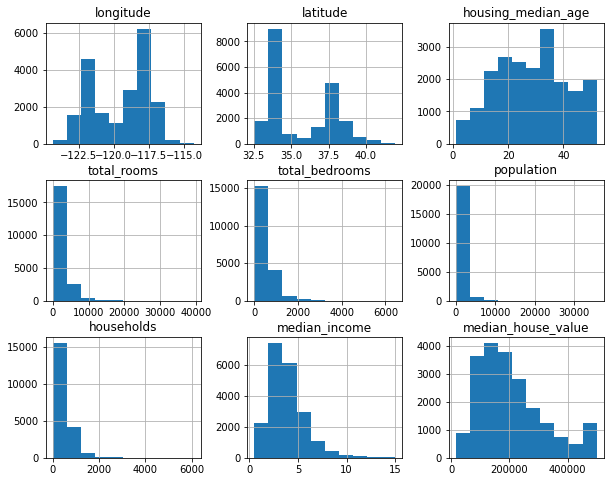

In [25]:
housing.hist(figsize=(10,8));

<AxesSubplot:>

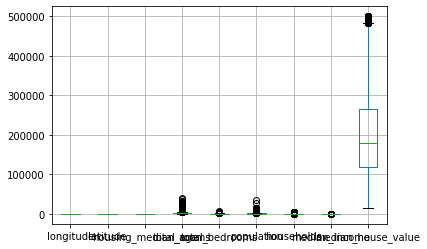

In [26]:
housing.boxplot()

In [27]:
train_set, test_set = train_test_split(housing,test_size=0.2, random_state=42)

In [28]:
len(train_set),len(test_set)

(16512, 4128)

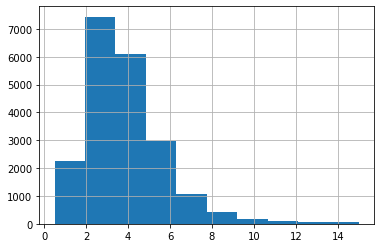

In [29]:
housing["median_income"].hist();

In [30]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

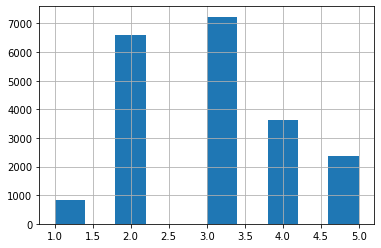

In [32]:
housing["income_cat"].hist();

In [33]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [34]:
#kontrol edelim
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Ana set": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "klasik train": income_cat_proportions(test_set),
}).sort_index()
compare_props["Klasik. %error"] = 100 * compare_props["klasik train"] / compare_props["Ana set"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Ana set"] - 100

compare_props

,Ana set,Stratified,klasik train,Klasik. %error,Strat. %error
1,0.039826,0.039729,0.040213,0.973236,-0.243309
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114583,0.109496,-4.318374,0.127011


In [36]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [37]:
housing = strat_train_set.copy()

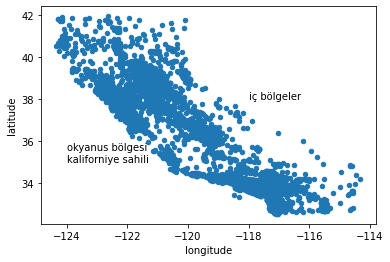

In [38]:
housing.plot(kind="scatter", x="longitude", y="latitude")
plt.text(-124,35,'okyanus bölgesi \nkaliforniye sahili')
plt.text(-118,38,'iç bölgeler');

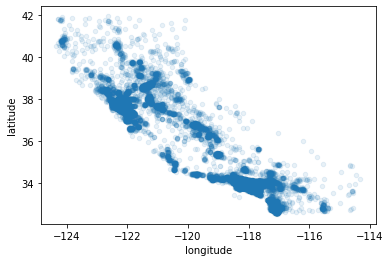

In [39]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1);

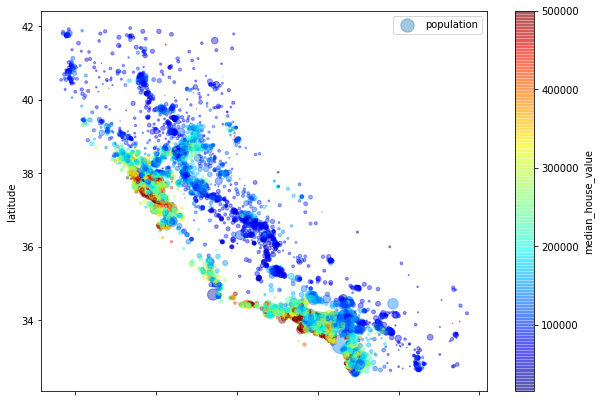

In [40]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=housing["population"]/100, label="population", figsize=(10,7),
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend();

In [42]:
corr_matrix=housing.corr()

In [44]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

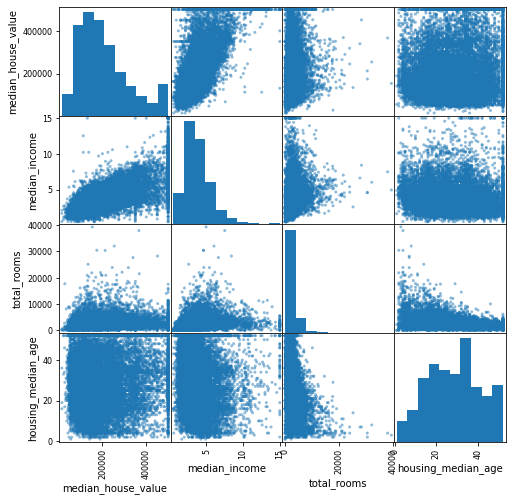

In [45]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes],figsize=(8,8));

In [46]:
X = strat_train_set.drop("median_house_value", axis=1)
y = strat_train_set["median_house_value"].copy()

In [47]:
X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

X_num=X.select_dtypes('number')
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),    
    ('std_scaler', StandardScaler()),
    ])
X_transform = num_pipeline.fit_transform(X_num)


num_attribs = list(X_num.columns)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
    ])
X_full_transformed = full_pipeline.fit_transform(X)

In [52]:
X_full_transformed[0]

array([-1.15604281,  0.77194962,  0.74333089, -0.49323393, -0.44543821,
       -0.63621141, -0.42069842, -0.61493744,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ])

In [53]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_full_transformed, y)

LinearRegression()

In [54]:
some_data = X.iloc[:5]
some_labels = y.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

#transform olmuş X değerleri neye benziyro bi görelim
some_data_prepared[0]

array([-1.15604281,  0.77194962,  0.74333089, -0.49323393, -0.44543821,
       -0.63621141, -0.42069842, -0.61493744,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ])

In [56]:
lin_reg.predict(some_data_prepared)

array([211574.39523833, 321345.10513719, 210947.519838  ,  61921.01197837,
       192362.32961119])

In [57]:
some_labels

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
Name: median_house_value, dtype: float64

In [59]:
housing_predictions = lin_reg.predict(X_full_transformed)
lin_mse = mean_squared_error(y, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

69050.98178244587

In [61]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [62]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,534.973890,1419.790819,497.060380,3.875589,206990.920724
std,2.001860,2.138058,12.574726,2138.458419,412.699041,1115.686241,375.720845,1.904950,115703.014830
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566775,119800.000000
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900,179500.000000
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.250000,602.000000,4.744475,263900.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000


In [63]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_full_transformed, y)

DecisionTreeRegressor(random_state=42)

In [64]:
housing_predictions = tree_reg.predict(X_full_transformed)
tree_mse = mean_squared_error(y, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [66]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, X_full_transformed, y,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [71]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
#     print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [66757.2013883  66708.05413959 71135.77592971 69317.58307062
 68729.37098167 75649.34082791 67043.83260349 70251.84122452
 69273.49135944 69161.37598811]
Mean: 69402.78675133755


In [72]:
lin_scores = cross_val_score(lin_reg, X_full_transformed, y,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [67450.42057782 67329.50264436 68361.84864912 74639.88837894
 68314.56738182 71628.61410355 65361.14176205 68571.62738037
 72476.18028894 68098.06828865]
Mean: 69223.18594556303


In [73]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_full_transformed, y)

RandomForestRegressor(random_state=42)

In [74]:
housing_predictions = forest_reg.predict(X_full_transformed)
forest_mse = mean_squared_error(y, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18381.60959473712

In [75]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, X_full_transformed, y,
                                scoring="neg_mean_squared_error", cv=3)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [49367.82940534 51568.40589692 51224.77179383]
Mean: 50720.33569869742


In [76]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(X_full_transformed, y)
housing_predictions = svm_reg.predict(X_full_transformed)
svm_mse = mean_squared_error(y, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

111803.81648688269

In [77]:
from sklearn.model_selection import GridSearchCV
#örnek olarak randomforestın parametre kombinasyonlarını belrleyelim
param_grid = [
    # önce şu 12(3*4) kombinasyonla baksın, 
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # sonra da şu 6(2*3), ama bu sefer bootsrap=False olsun , yukardakinde default değeri Truedur
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}, #boolen gibi tek değer girilse bile [] içine
  ]

forest_reg = RandomForestRegressor(random_state=42)
# cv yaparken 5 fold yapsın. yani toplamda 5*(12+6)=90 farklı kombinasyon çalışacak, biraz uzun sürebilir
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_full_transformed, y) #bozmuş oalbilirim, fit_rsnatafom oalbilir

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [78]:
#en uygun parametrelere bakalım
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [79]:
#full en iyi parametre lsitesini görelim
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30, random_state=42)

In [80]:
#18 kombinasyonunu ortalam skorlarına bakalım. 6'ya 30'un en düşük rmseye sahip olduğnu da görelim
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

65005.182970763315 {'max_features': 2, 'n_estimators': 3}
55582.91015494046 {'max_features': 2, 'n_estimators': 10}
52745.33887865031 {'max_features': 2, 'n_estimators': 30}
60451.18914812725 {'max_features': 4, 'n_estimators': 3}
53062.818497303946 {'max_features': 4, 'n_estimators': 10}
50663.79774079741 {'max_features': 4, 'n_estimators': 30}
57998.07162873506 {'max_features': 6, 'n_estimators': 3}
52042.04702364244 {'max_features': 6, 'n_estimators': 10}
50028.060190761295 {'max_features': 6, 'n_estimators': 30}
58308.44501796401 {'max_features': 8, 'n_estimators': 3}
52082.74313186547 {'max_features': 8, 'n_estimators': 10}
50165.81805010987 {'max_features': 8, 'n_estimators': 30}
62709.54311517104 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54062.01766032325 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60613.541905953585 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53742.988651846914 {'bootstrap': False, 'max_features': 3, 'n_estimators

In [81]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

#randomforestın n_estimator değeri 1-200 arsında, max_fateurs değeri de 1-8 arasında rasgele seçilece. ve en alttaki 
#n_iter paraemtresindeki 10 değeri sayesinde 10 kez çalıştılracak
param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(X_full_transformed, y)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000265D76FB1F0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000265D74B6250>},
                   random_state=42, scoring='neg_mean_squared_error')

In [82]:
#skorlara bakalım
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49462.596134607906 {'max_features': 7, 'n_estimators': 180}
51676.97211565583 {'max_features': 5, 'n_estimators': 15}
50827.83871022729 {'max_features': 3, 'n_estimators': 72}
51117.698297994146 {'max_features': 5, 'n_estimators': 21}
49585.185219390754 {'max_features': 7, 'n_estimators': 122}
50836.040148806715 {'max_features': 3, 'n_estimators': 75}
50746.890270152086 {'max_features': 3, 'n_estimators': 88}
49788.190631507045 {'max_features': 5, 'n_estimators': 100}
50574.565725719985 {'max_features': 3, 'n_estimators': 150}
65153.787556165735 {'max_features': 5, 'n_estimators': 2}
